In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Collecting data

In [4]:
#Title
#title=x.find('h3', attrs={'class' : 'lister-item-header'})
#dictionary
#dic=x.find('p', attrs={'class' : ''})
#gross
#gro=x.find('p', attrs={'class' : 'sort-num_votes-visible'})
#genre    
#g=x.find('span', attrs={'class' : 'genre'})
#ratings
#r=x.find('strong')
#certificates
#cer=x.find('span', attrs={'class' : 'certificate'})
#years
#y=x.find('span', attrs={'class' : 'lister-item-year text-muted unbold'})
#votes
#v=x.find('p', attrs={'class' : 'sort-num_votes-visible'})

In [5]:
url="https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start="
title1=[]
director=[]
gross=[]
genre=[]
votes=[]
ratings=[]
certificates=[]
years=[]
for i in range(1, 401,50):
    urls=url+str(i)
    print(urls)
    data = requests.get(urls)
    
    soup = BeautifulSoup(data.text)
    
    for x in soup.find_all("div", attrs={'class' : 'lister-item-content'}):

        #Title
        title=x.find('h3', attrs={'class' : 'lister-item-header'})
        if title is None:
            title1.append(np.NaN)
        else:
            title1.append(title.text.split('\n')[2])
            
        #dictionary
        dic=x.find('p', attrs={'class' : ''})
        if dic is None:
            director.append(np.NaN)
        else:
            director.append(dic.text.split("\n")[2])
            
        #gross
        gro=x.find('p', attrs={'class' : 'sort-num_votes-visible'})
        b=re.findall("(\d+.\d+)M",x.text)
        if len(b)==0:
            gross.append(np.NaN)
        else:
            gross.append(b[0])
            
        #genre    
        g=x.find('span', attrs={'class' : 'genre'})
        if g is None:
            genre.append(np.NaN)
        else:
            genre.append(g.text.split("\n")[1].split(',')[0])
            
        #ratings
        r=x.find('strong')
        if r is None:
            ratings.append(np.NaN)
        else:
            ratings.append(r.text)
            
        #certificates
        cer=x.find('span', attrs={'class' : 'certificate'})
        if cer is None:
            certificates.append(np.NaN)
        else:
            certificates.append(cer.text)
            
        #years
        y=x.find('span', attrs={'class' : 'lister-item-year text-muted unbold'})
        a=x.text
        b=re.findall(r"(\d{4})", y.text)
        if len(b)>0== None:
            years.append(np.NaN)
        else:
            years.append(b[0])
            
        #votes
        v=x.find('p', attrs={'class' : 'sort-num_votes-visible'})
        if v is None:
            votes.append(np.NaN)
        else:
            votes.append(v.text.split("\n")[2])


https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=1
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=51
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=101
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=151
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=201
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=251
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=301
https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start=351


In [6]:
print(len(title1))
print(len(director))
print(len(gross))
print(len(genre))
print(len(votes))
print(len(ratings))
print(len(certificates))
print(len(years))

400
400
400
400
400
400
400
400


In [7]:
df = pd.DataFrame({
    'Movie_Titles':title1,
    'Director':director,
    'Genre':genre,
    'IMDB_Ratings':ratings,
    'Votes':votes,
    'Certificate':certificates,
    'Gross':gross,
    'Years':years
    
})

In [8]:
#Dataframe
df

,Movie_Titles,Director,Genre,IMDB_Ratings,Votes,Certificate,Gross,Years
0,The Shawshank Redemption,Frank Darabont,Drama,9.3,"2,614,970",A,28.34,1994
1,The Godfather,Francis Ford Coppola,Crime,9.2,"1,810,374",A,134.97,1972
2,The Dark Knight,Christopher Nolan,Action,9.0,"2,587,139",UA,534.86,2008
3,The Lord of the Rings: The Return of the King,Peter Jackson,Action,9.0,"1,794,699",U,377.85,2003
4,Schindler's List,Steven Spielberg,Biography,9.0,"1,328,819",A,96.90,1993
...,...,...,...,...,...,...,...,...
395,Central do Brasil,Walter Salles,Drama,8.0,"39,517",R,5.60,1998
396,La leggenda del pianista sull'oceano,Giuseppe Tornatore,Drama,8.0,"63,966",Not Rated,0.26,1998
397,"Crna macka, beli macor",Emir Kusturica,Comedy,8.0,"53,595",R,0.35,1998
398,Sling Blade,Billy Bob Thornton,Drama,8.0,"93,627",R,24.48,1996


In [9]:
#Data Cleaning

In [10]:
df.shape

(400, 8)

In [11]:
df.describe()

,Movie_Titles,Director,Genre,IMDB_Ratings,Votes,Certificate,Gross,Years
count,400,400,400,400,400,349,320,400
unique,399,266,13,13,400,17,291,90
top,Drishyam,Akira Kurosawa,Action,8.1,"2,614,970",U,0.01,2004
freq,2,9,82,128,1,115,5,13


In [12]:
df.isnull().sum()

Movie_Titles     0
Director         0
Genre            0
IMDB_Ratings     0
Votes            0
Certificate     51
Gross           80
Years            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie_Titles  400 non-null    object
 1   Director      400 non-null    object
 2   Genre         400 non-null    object
 3   IMDB_Ratings  400 non-null    object
 4   Votes         400 non-null    object
 5   Certificate   349 non-null    object
 6   Gross         320 non-null    object
 7   Years         400 non-null    object
dtypes: object(8)
memory usage: 25.1+ KB


In [14]:
# Filling Missing Values

In [15]:
df

,Movie_Titles,Director,Genre,IMDB_Ratings,Votes,Certificate,Gross,Years
0,The Shawshank Redemption,Frank Darabont,Drama,9.3,"2,614,970",A,28.34,1994
1,The Godfather,Francis Ford Coppola,Crime,9.2,"1,810,374",A,134.97,1972
2,The Dark Knight,Christopher Nolan,Action,9.0,"2,587,139",UA,534.86,2008
3,The Lord of the Rings: The Return of the King,Peter Jackson,Action,9.0,"1,794,699",U,377.85,2003
4,Schindler's List,Steven Spielberg,Biography,9.0,"1,328,819",A,96.90,1993
...,...,...,...,...,...,...,...,...
395,Central do Brasil,Walter Salles,Drama,8.0,"39,517",R,5.60,1998
396,La leggenda del pianista sull'oceano,Giuseppe Tornatore,Drama,8.0,"63,966",Not Rated,0.26,1998
397,"Crna macka, beli macor",Emir Kusturica,Comedy,8.0,"53,595",R,0.35,1998
398,Sling Blade,Billy Bob Thornton,Drama,8.0,"93,627",R,24.48,1996


In [16]:
df['Certificate'] = df['Certificate'].fillna(" ")

In [20]:
df1=df['Gross'].mean()

In [21]:
df['Gross'] = df['Gross'].fillna(df1)

In [22]:
# converting Data Values to respective Dtypes

In [23]:
df['IMDB_Ratings'].astype('float')

0      9.3
1      9.2
2      9.0
3      9.0
4      9.0
      ... 
395    8.0
396    8.0
397    8.0
398    8.0
399    8.0
Name: IMDB_Ratings, Length: 400, dtype: float64

In [24]:
df['IMDB_Ratings']=df['IMDB_Ratings'].astype('float')

In [25]:
v = []
for i in df['Votes']:
    v.append(i.replace(",",''))
    
df['Votes'] = v

In [26]:
df['Votes']=df['Votes'].astype('int')

In [27]:
df['Years']=df['Years'].astype('int')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie_Titles  400 non-null    object 
 1   Director      400 non-null    object 
 2   Genre         400 non-null    object 
 3   IMDB_Ratings  400 non-null    float64
 4   Votes         400 non-null    int32  
 5   Certificate   400 non-null    object 
 6   Gross         400 non-null    float64
 7   Years         400 non-null    int32  
dtypes: float64(2), int32(2), object(4)
memory usage: 22.0+ KB


In [29]:
df.to_csv('Movie Analysis.csv')

In [30]:
df=pd.read_csv('Movie Analysis.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    400 non-null    int64  
 1   Movie_Titles  400 non-null    object 
 2   Director      400 non-null    object 
 3   Genre         400 non-null    object 
 4   IMDB_Ratings  400 non-null    float64
 5   Votes         400 non-null    int64  
 6   Certificate   400 non-null    object 
 7   Gross         400 non-null    float64
 8   Years         400 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 28.2+ KB


In [32]:
df['Gross']=df['Gross'].astype('float')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    400 non-null    int64  
 1   Movie_Titles  400 non-null    object 
 2   Director      400 non-null    object 
 3   Genre         400 non-null    object 
 4   IMDB_Ratings  400 non-null    float64
 5   Votes         400 non-null    int64  
 6   Certificate   400 non-null    object 
 7   Gross         400 non-null    float64
 8   Years         400 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 28.2+ KB


In [34]:
#Data Analysis

In [35]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
#Univariate Analysis

In [37]:
df.columns

Index(['Unnamed: 0', 'Movie_Titles', 'Director', 'Genre', 'IMDB_Ratings',
       'Votes', 'Certificate', 'Gross', 'Years'],
      dtype='object')

In [38]:
df['Certificate'].value_counts()

U            115
UA            91
A             90
              51
R             21
18             6
7              4
PG-13          4
PG             3
16             3
Not Rated      3
G              2
13             2
UA 13+         1
15+            1
M/PG           1
Unrated        1
12+            1
Name: Certificate, dtype: int64

C:\Users\lenovo\Documents\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


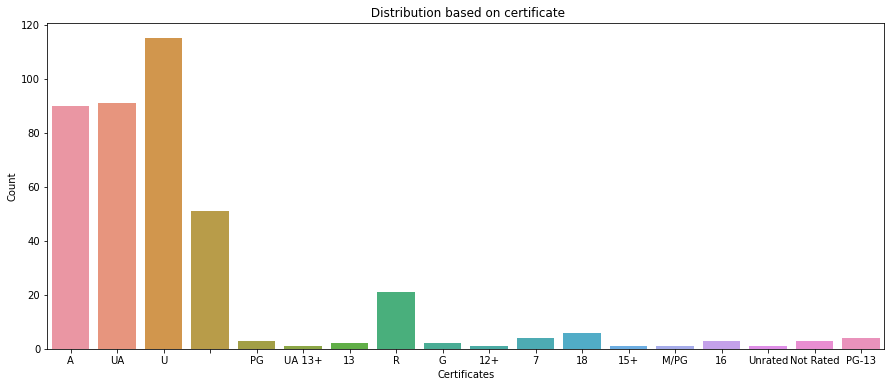

In [39]:
plt.figure(figsize = (15, 6))
sns.countplot(df['Certificate'])
plt.title(' Distribution based on certificate')
plt.xlabel('Certificates')
plt.ylabel('Count')
plt.show()

In [40]:
Genre_count= df.Genre.value_counts().head(10)

In [41]:
Genre_count=Genre_count.drop('Drama')

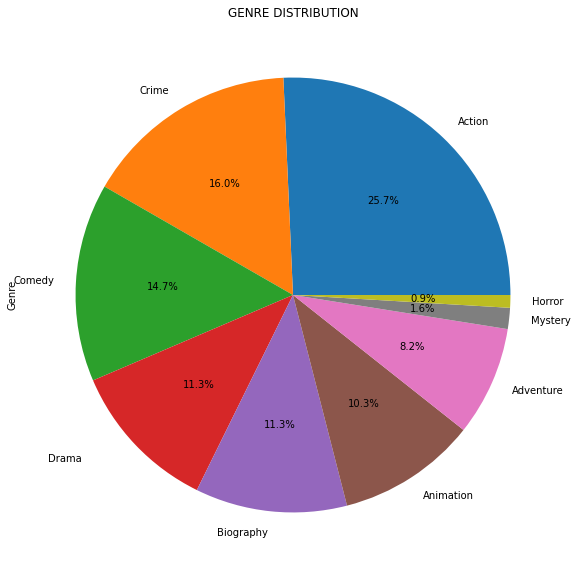

In [42]:
#Genre Distribution
Genre_count.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title('GENRE DISTRIBUTION')
plt.show()

In [43]:
year_count= df.Years.value_counts().head(20)

In [44]:
year_count

2004    13
2019    13
2014    12
2016    11
2012    11
2015    11
2013    11
2001    10
2007    10
1998    10
2018    10
2006    10
2003    10
2010     9
1995     9
1999     9
2021     8
1957     8
1997     7
2000     7
Name: Years, dtype: int64

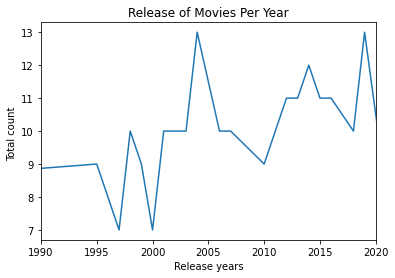

In [45]:
sns.lineplot(data=year_count)
plt.title('Release of Movies Per Year')
plt.xlim(1990,2020)
plt.xlabel('Release years')
plt.ylabel('Total count ')
plt.show()

In [46]:
#Bivariate Analysis

In [47]:
df.columns

Index(['Unnamed: 0', 'Movie_Titles', 'Director', 'Genre', 'IMDB_Ratings',
       'Votes', 'Certificate', 'Gross', 'Years'],
      dtype='object')

In [48]:
# high votes movies
top_movies = df.sort_values(['Votes','Gross'], ascending = False)[['Movie_Titles','Votes','Gross']].head(10)

In [49]:
top_movies

,Movie_Titles,Votes,Gross
0,The Shawshank Redemption,2614970,28.34
2,The Dark Knight,2587139,534.86
9,Inception,2294730,292.58
11,Fight Club,2061027,37.03
13,Forrest Gump,2021825,330.25
8,Pulp Fiction,2003274,107.93
16,The Matrix,1875232,171.48
12,The Lord of the Rings: The Fellowship of the Ring,1815906,315.54
1,The Godfather,1810374,134.97
3,The Lord of the Rings: The Return of the King,1794699,377.85


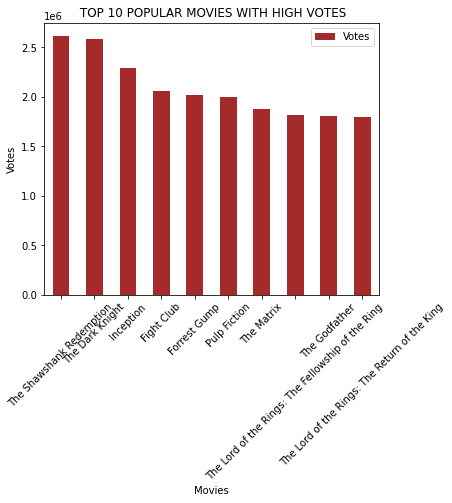

In [50]:
top_movies.plot(kind='bar', x='Movie_Titles', y= 'Votes', figsize=(6,5), color='brown', rot=45)
plt.title(' TOP 10 POPULAR MOVIES WITH HIGH VOTES')
plt.xlabel('Movies')
plt.ylabel('Votes')
plt.show()

In [51]:
top_movies = df.sort_values(['Gross','Votes'], ascending = False)[['Movie_Titles','Votes','Gross']].head(10)

In [52]:
top_movies

,Movie_Titles,Votes,Gross
65,Avengers: Endgame,1079473,858.37
101,Spider-Man: No Way Home,687592,804.75
66,Avengers: Infinity War,1037588,678.82
368,The Avengers,1367434,623.28
2,The Dark Knight,2587139,534.86
69,The Dark Knight Rises,1669431,448.14
49,The Lion King,1035796,422.78
104,Toy Story 3,822326,415.00
176,Jurassic Park,968394,402.45
241,Harry Potter and the Deathly Hallows: Part 2,856200,381.01


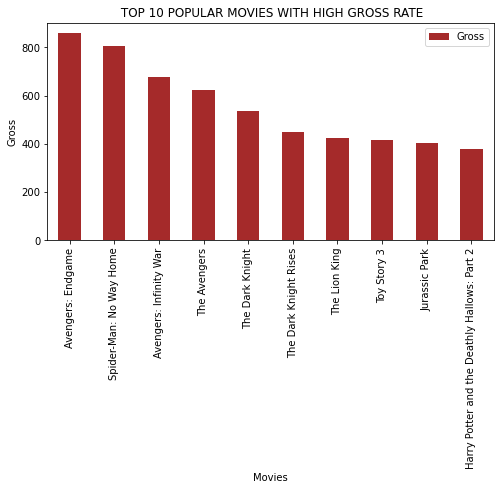

In [53]:
top_movies.plot(kind='bar', x='Movie_Titles', y= 'Gross', figsize=(8,4), color='brown', rot=90)
plt.title(' TOP 10 POPULAR MOVIES WITH HIGH GROSS RATE')
plt.xlabel('Movies')
plt.ylabel('Gross')
plt.show()

In [54]:
lowrated_movies = df.sort_values(['Votes','Gross'], ascending = True)[['Movie_Titles','Votes','Gross']].head(10)

In [55]:
lowrated_movies

,Movie_Titles,Votes,Gross
259,Her Sey Çok Güzel Olacak,25429,79.785437
262,Sarfarosh,25606,79.785437
197,Umberto D.,25741,0.070000
285,Jean de Florette,25811,4.940000
34,Kaithi,27184,79.785437
35,Asuran,27396,79.785437
213,Masaan,27782,79.785437
374,Dare mo shiranai,27850,0.680000
188,Z,28589,0.080000
278,Ba wang bie ji,28674,5.220000


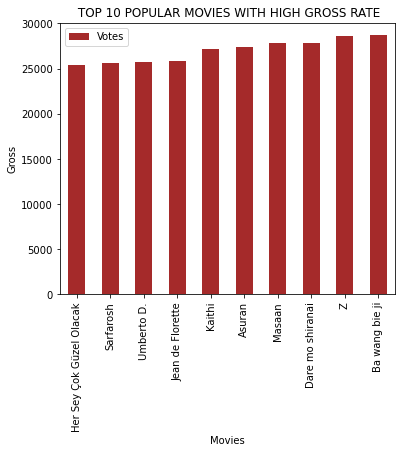

In [56]:
lowrated_movies.plot(kind='bar', x='Movie_Titles', y= 'Votes', figsize=(6,5), color='brown', rot=90)
plt.title(' TOP 10 POPULAR MOVIES WITH HIGH GROSS RATE')
plt.xlabel('Movies')
plt.ylabel('Gross')
plt.show()

In [57]:
df.Director.value_counts().head(10)

Akira Kurosawa       9
Martin Scorsese      7
Christopher Nolan    7
Steven Spielberg     7
Stanley Kubrick      7
Alfred Hitchcock     6
Charles Chaplin      6
Quentin Tarantino    6
Ingmar Bergman       6
Billy Wilder         6
Name: Director, dtype: int64

In [58]:
revenue_directors = df.groupby('Director').agg({'Gross': 'mean'})
top_5_revenue_directors = revenue_directors.sort_values('Gross', ascending=False)[:10]
top_5_revenue_directors

,Gross
Director,
Jon Watts,804.750000
"Anthony Russo,",768.595000
Joss Whedon,623.280000
"Roger Allers,",422.780000
Lee Unkrich,415.000000
David Yates,381.010000
"Andrew Stanton,",380.840000
Tim Miller,363.070000
Peter Jackson,345.313333


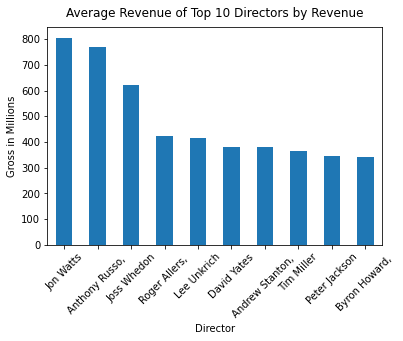

In [59]:
ax = top_5_revenue_directors['Gross'].plot.bar();
ax.set_ylabel('Gross in Millions')
ax.set_title('Average Revenue of Top 10 Directors by Revenue', y=1.02)
ax.set_xticklabels(top_5_revenue_directors.index, rotation = 45);

In [60]:
#Multivariate analysis

In [61]:
df.columns

Index(['Unnamed: 0', 'Movie_Titles', 'Director', 'Genre', 'IMDB_Ratings',
       'Votes', 'Certificate', 'Gross', 'Years'],
      dtype='object')

In [62]:
Genre_count

Action               82
Crime                51
Comedy               47
Drama                36
Biography            36
Animation            33
Adventure            26
Mystery               5
Horror                3
Name: Genre, dtype: int64

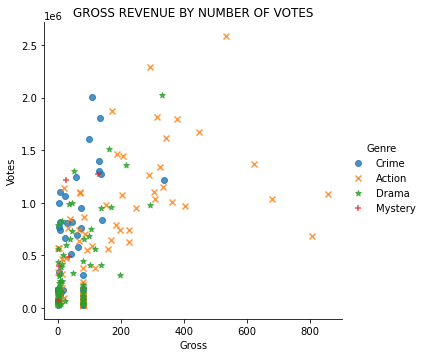

In [63]:
sns.lmplot(x='Gross',y='Votes',markers=['o', 'x', '*','+'],hue='Genre',
           data=df.loc[df['Genre'].isin(['Action','Drama','Crime','Mystery' ])],fit_reg=False)
plt.title("GROSS REVENUE BY NUMBER OF VOTES")
plt.show()

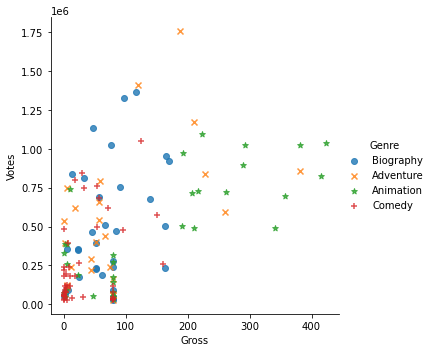

In [64]:
sns.lmplot(x='Gross',y='Votes',markers=['o', 'x', '*','+'],hue='Genre',
           data=df.loc[df['Genre'].isin(['Comedy','Biography','Animation','Adventure' ])],fit_reg=False)

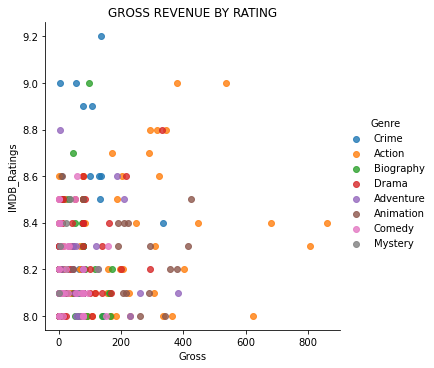

In [65]:
sns.lmplot(x='Gross',y='IMDB_Ratings',hue='Genre',
           data=df.loc[df['Genre'].isin(['Comedy','Biography','Animation','Adventure','Action','Drama','Crime','Mystery' ])],fit_reg=False)
plt.title("GROSS REVENUE BY RATING")
plt.show()

<AxesSubplot:>

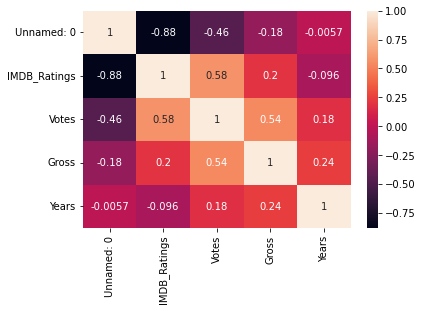

In [69]:
sns.heatmap(df.corr(),annot=True)

In [70]:
df.columns

Index(['Unnamed: 0', 'Movie_Titles', 'Director', 'Genre', 'IMDB_Ratings',
       'Votes', 'Certificate', 'Gross', 'Years'],
      dtype='object')

In [71]:
df=df.drop('Unnamed: 0',axis=1)

In [72]:
top_movies = df.sort_values(['Gross','IMDB_Ratings'], ascending = False)[['Movie_Titles','IMDB_Ratings','Gross']].head(10)

In [73]:
top_movies

,Movie_Titles,IMDB_Ratings,Gross
65,Avengers: Endgame,8.4,858.37
101,Spider-Man: No Way Home,8.3,804.75
66,Avengers: Infinity War,8.4,678.82
368,The Avengers,8.0,623.28
2,The Dark Knight,9.0,534.86
69,The Dark Knight Rises,8.4,448.14
49,The Lion King,8.5,422.78
104,Toy Story 3,8.3,415.00
176,Jurassic Park,8.2,402.45
241,Harry Potter and the Deathly Hallows: Part 2,8.1,381.01


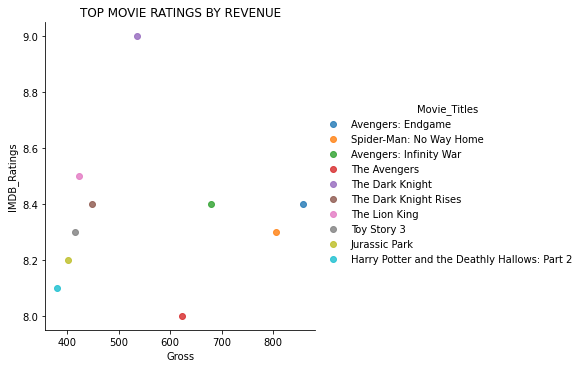

In [74]:
sns.lmplot(x='Gross',y='IMDB_Ratings',hue='Movie_Titles',
           data=top_movies,fit_reg=False) #positive correlation
plt.title("TOP MOVIE RATINGS BY REVENUE")
plt.show()

In [75]:
df

,Movie_Titles,Director,Genre,IMDB_Ratings,Votes,Certificate,Gross,Years
0,The Shawshank Redemption,Frank Darabont,Drama,9.3,2614970,A,28.34,1994
1,The Godfather,Francis Ford Coppola,Crime,9.2,1810374,A,134.97,1972
2,The Dark Knight,Christopher Nolan,Action,9.0,2587139,UA,534.86,2008
3,The Lord of the Rings: The Return of the King,Peter Jackson,Action,9.0,1794699,U,377.85,2003
4,Schindler's List,Steven Spielberg,Biography,9.0,1328819,A,96.90,1993
...,...,...,...,...,...,...,...,...
395,Central do Brasil,Walter Salles,Drama,8.0,39517,R,5.60,1998
396,La leggenda del pianista sull'oceano,Giuseppe Tornatore,Drama,8.0,63966,Not Rated,0.26,1998
397,"Crna macka, beli macor",Emir Kusturica,Comedy,8.0,53595,R,0.35,1998
398,Sling Blade,Billy Bob Thornton,Drama,8.0,93627,R,24.48,1996
